## Developed by: Scott Brandenberg (sjbrandenberg@g.ucla.edu)

### Adapted for Terzaghi 1D PINN Comparison (Umar Siddique zcapusi@ucl.ac.uk)

# Fourier series solution to Terzaghi's one-dimensional consolidation equation

Terzaghi's one-dimensional consolidation equation is:

$\qquad c_v\frac{\partial^2 u}{\partial z^2} = \frac{\partial u}{\partial t}$

The solution to this equation is obtained by separation of variables and a Fourier series to be:

$\qquad U_z = 1 - \sum_{n=1}^{\infty}\frac{4}{\pi n}sin^2\left(\frac{\pi n}{2}\right)sin\left(\frac{\pi n Z}{2}\right)e^{-\frac{Tn^2\pi^2}{4}}$

$\qquad$ where $U_z = 1 - \frac{u_e}{\Delta\sigma_v}$, $T = \frac{c_v t}{H^2}$, $Z = \frac{z}{H}$, $z$ is depth, and $H$ is drainage path length.

Of course, we can't actually perform this sum from 1 to $\infty$, so we have to select a suitable number of terms in the Fourier series, N, to obtain an accurate solution:

$\qquad U_z \approx 1 - \sum_{n=1}^{N}\frac{4}{\pi n}sin^2\left(\frac{\pi n}{2}\right)sin\left(\frac{\pi n Z}{2}\right)e^{-\frac{Tn^2\pi^2}{4}}$

The question is how many terms do we need to include in the Fourier series to obtain an accurate solution? Run the code cell below, and move the slider to observe the influence of N on the solution. Feel free to alter the list of T values if you'd like to explore.

Notice that the $sin^2\left(\frac{\pi n}{2}\right)$ term is equal to 0 for even n, and 1 for odd n. I have summed only over odd values of n to make the code faster.

## Terzaghi for Paper Plot

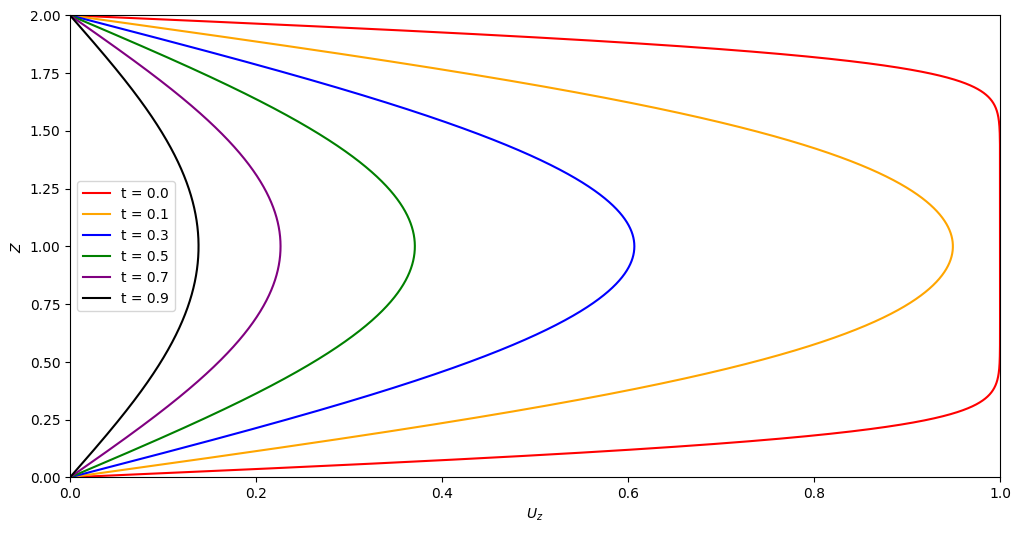

In [11]:
import numpy as np
from matplotlib import pyplot as plt

def Uz(N,Z,T):
    uz = 0
    #function is zero for even values of n. Therefore only compute for odd values
    for n in range(1,N+1,2):
        uz += 4.0/np.pi/n*np.sin(np.pi*n/2.0*Z)*np.exp(-1.0*n*n*np.pi*np.pi/4.0*T)
    return uz

cv = 1.0 # consolidation m^2/year
H = 2.0/2 # drainage path length
t = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]
T = (cv*np.array(t))/H**2
Z = np.linspace(0.0,2.0,num=5000)
N = 1000

line_colors = ['red', 'orange', 'blue', 'green', 'purple', 'black']  

fig,ax = plt.subplots(1,1, figsize=(12,6))
ax.set_xlabel('$U_z$')
ax.set_ylabel('$Z$')
ax.set_xlim(0.,1.0)
ax.set_ylim(0,2)
plots = []

for idx, t in enumerate(T):
    u = []
    for z in Z:
        u.append(Uz(N, z, t))
    plt.plot(u, Z, color=line_colors[idx], label=f't = {t:.1f}')
plt.legend()
plt.show()

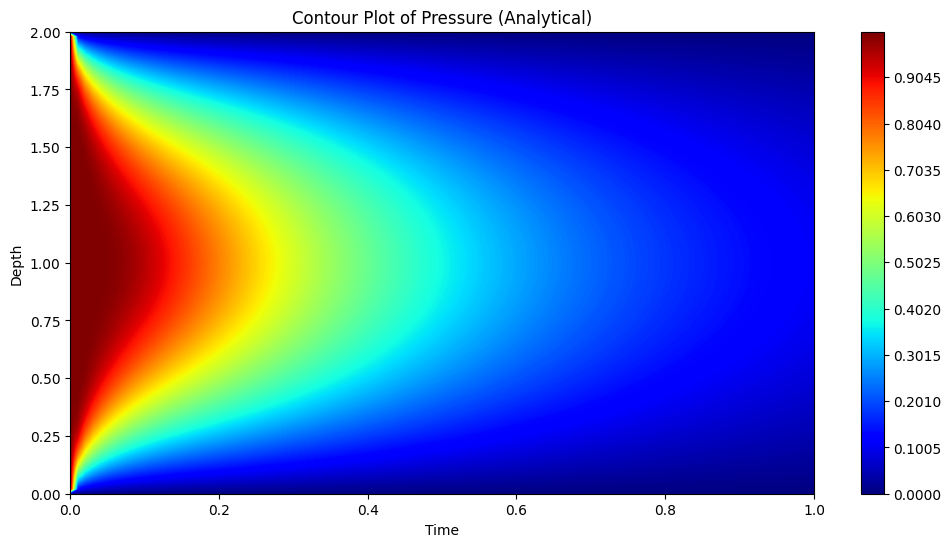

In [9]:
# Parameters for the contour plot
c_v = 1.0  # Adjustable parameter
time = np.linspace(0, 1, 100)  # Time range
depth = np.linspace(0, 2, 100)  # Depth range
T_contour = np.array([[c_v * t / (H**2) for t in time] for z in depth])

# Create the meshgrid for contour plot
T_mesh, Z_mesh = np.meshgrid(time, depth)
U_mesh = np.zeros_like(T_mesh)

for i in range(len(depth)):
    for j in range(len(time)):
        U_mesh[i, j] = Uz(N, Z_mesh[i, j], T_contour[i, j])

# Plot the contour plot
fig2, ax2 = plt.subplots(figsize=(12,6))
contour = ax2.contourf(T_mesh, Z_mesh, U_mesh, levels=1000, cmap='jet', vmin=0., vmax=1)
fig2.colorbar(contour)
ax2.set_xlabel('Time')
ax2.set_ylabel('Depth')
ax2.set_title('Contour Plot of Pressure (Analytical)')
plt.show()